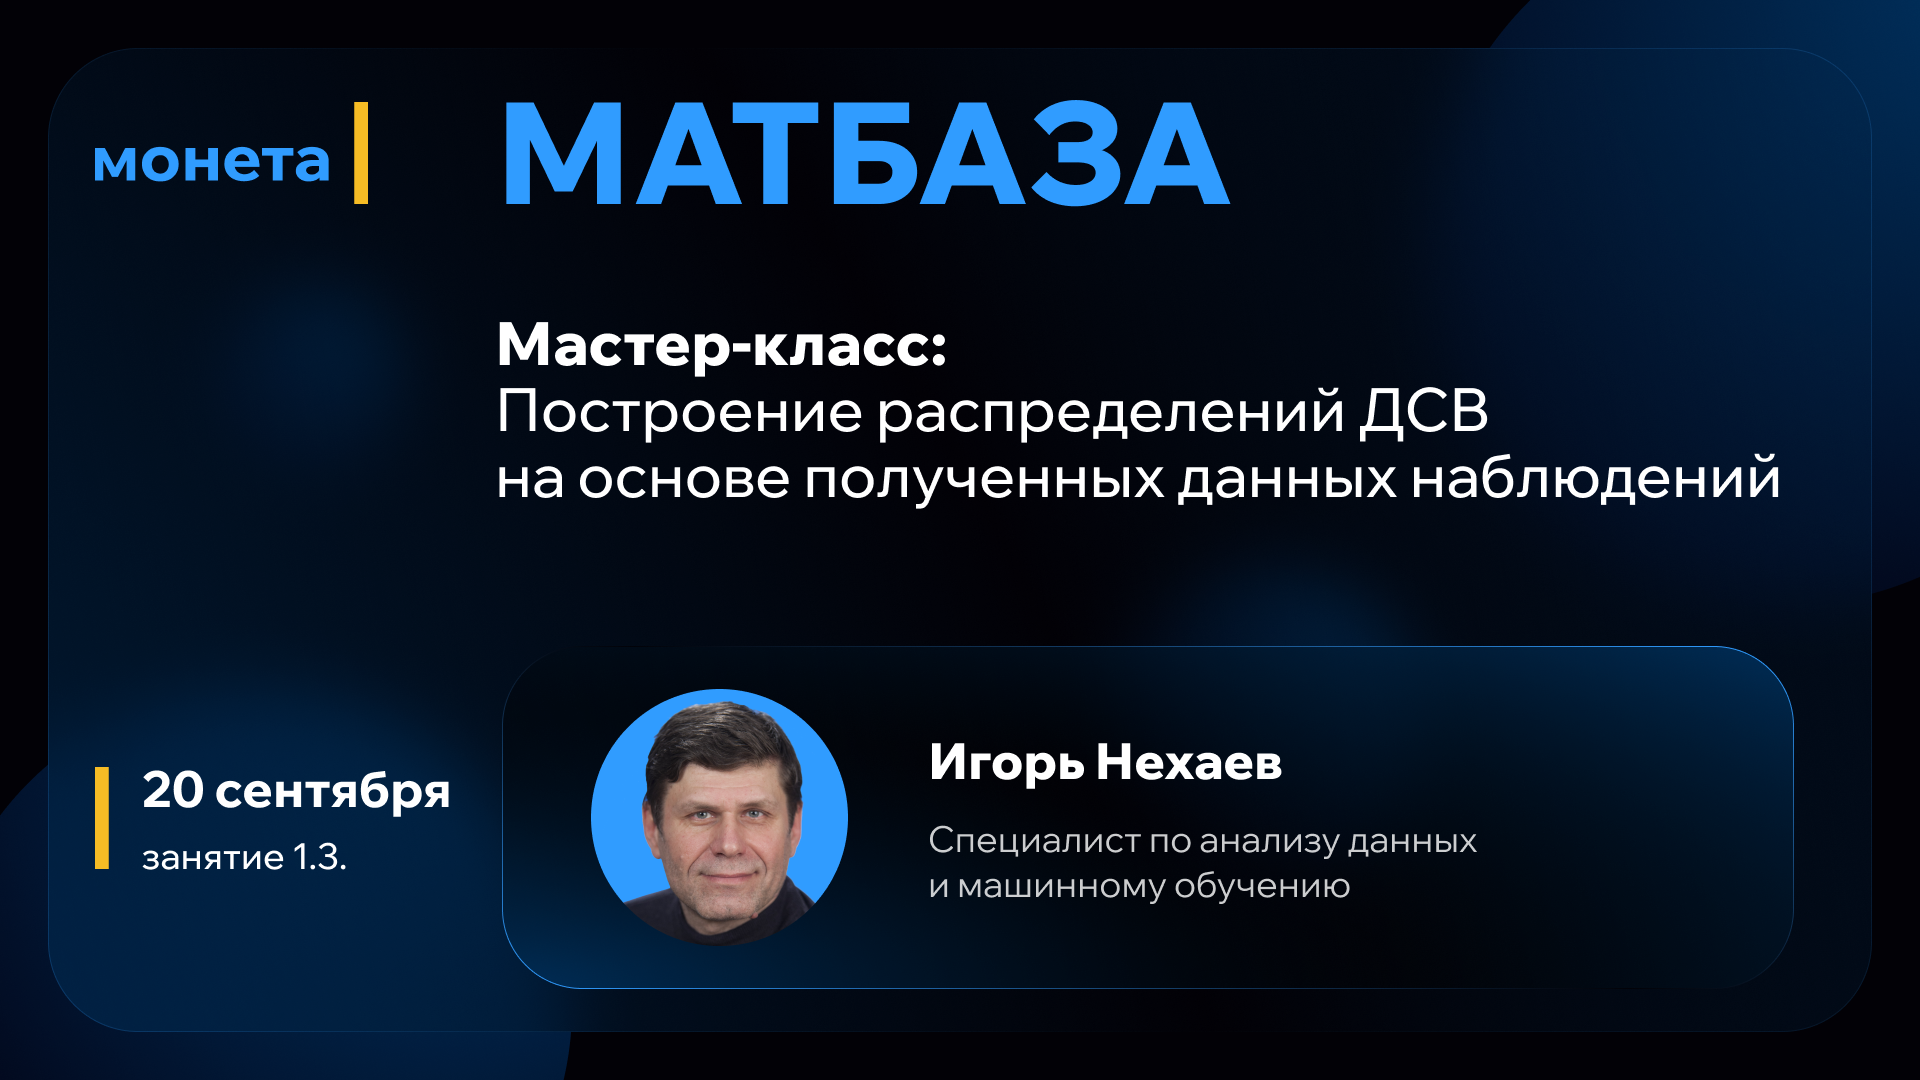

# TV_lesson-03. Построение распределений ДСВ на основе полученных данных (практика).
---
- моделирование эксперимента с ДСВ "Кол-во заявок на обслуживание";
- построение эмпирической функции вероятности; построение полигона частот;
- загрузка и предварительная обработка данных по подключению сайтов клиентов;
- построение эмпирической функции вероятности;
- анализ вероятностного распределения ДСВ.


In [ ]:
# импорт библиотеки для работы с массивами, последовательностями и для построения графиков
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

<Figure size 500x300 with 0 Axes>

## Моделирование эксперимента "Поток заявок". ДСВ: количество обращений клиентов в службу поддержки.
---

> Рассмотрим процесс обращения клиентов в компанию (в службу поддержки, заявлений о подключении, ...). Предположим, что нам известно, что в среднем за месяц (за 30 дней) в службу поддержки поступает примерно 1800 обращений. Т.е. примерно 60 обращений в день или 2.5 обращения за час. Нам интересно узнать а сколько максимально может быть обращений в день?

> Мы можем фиксировать кол-во обращений в день и построить верочтностное распределение для ДСВ "Кол-во обращений в день". Но сейчас мы попробуем промоделировать это распределение с использованием серии испытаний Бернулли.



### Распределение Бернулли
Будем считать, что каждую минуту в службу поддержки может поступить обращение от клиента с вероятностью 0.04. Таким образом каждую минуту мы проводим испытание Бернулли с вероятностью "УСПЕХА", равное 0.04. Т.е. имеем следующее распределение Бернулли для С.В. X = "Клиент обратился в службу поддержки":

> $x_i$ | 0 | 1
> ---- | - | -
> $p(x_i)$| 0.96 | 0.04

Тогда за сутки мы имеем 24 х 60 испытаний Бернулли. Смоделируем результат испытаний

In [ ]:
# описываем результат одного испытания Бернулли с вероятностью успеха p
def Bernulli(p):
    X = int(np.random.random() <= p)
    return X

p = 0.04
Bernulli(p), Bernulli(p), Bernulli(p), Bernulli(p), Bernulli(p)

(0, 0, 0, 1, 0)

### Случайная величина Y = "Кол-во заявок за час"
---
Значение данной СВ мы можем найти просто просуммировав значения СВ Xi, i=1..60 полученные при ежеминутном испытании Бернулли:

$$Y = \sum_{i=1}^{60} X_i$$

In [ ]:
# Смоделируем 60 испытаний и подсчитаем кол-во поступивших заявок за час
def requests_a_hour(p, n = 60):
    S = sum(np.random.random(n) <= p)
    return S

requests_a_hour(p), requests_a_hour(p), requests_a_hour(p)

(4, 2, 2)

In [ ]:
np.random.seed(1234)

# смоделируем наблюдения за неделю (24 * 7 значений С.В. Y)
Yi = [requests_a_hour(p) for _ in range(24 * 14)]
print(Yi)

[2, 2, 1, 2, 4, 2, 4, 2, 4, 2, 7, 1, 2, 2, 1, 4, 3, 2, 5, 3, 3, 2, 4, 4, 4, 4, 2, 3, 3, 6, 2, 2, 1, 4, 1, 3, 1, 3, 1, 2, 3, 4, 4, 2, 0, 0, 1, 3, 2, 2, 4, 1, 3, 1, 2, 2, 3, 2, 2, 2, 4, 1, 5, 4, 3, 2, 5, 2, 2, 3, 0, 0, 1, 3, 3, 3, 4, 1, 3, 4, 3, 1, 1, 2, 3, 5, 5, 3, 4, 2, 2, 1, 2, 1, 3, 4, 1, 1, 2, 3, 3, 3, 1, 1, 4, 1, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 3, 3, 1, 4, 2, 3, 0, 4, 1, 2, 1, 4, 2, 3, 3, 1, 1, 4, 4, 1, 3, 4, 1, 0, 1, 3, 1, 3, 3, 2, 2, 1, 0, 1, 1, 3, 5, 3, 6, 1, 3, 2, 0, 1, 2, 3, 2, 2, 4, 2, 5, 2, 3, 3, 2, 1, 1, 7, 2, 4, 3, 1, 6, 4, 2, 2, 3, 2, 1, 3, 0, 0, 4, 4, 3, 4, 3, 5, 7, 4, 3, 1, 3, 6, 3, 2, 4, 3, 2, 2, 3, 5, 3, 2, 0, 4, 4, 4, 2, 0, 1, 4, 4, 2, 1, 2, 1, 4, 4, 4, 1, 5, 5, 2, 3, 3, 0, 2, 3, 2, 2, 1, 1, 2, 4, 2, 3, 4, 2, 2, 0, 1, 2, 1, 1, 0, 4, 6, 3, 3, 3, 4, 1, 0, 2, 3, 3, 1, 4, 2, 3, 3, 0, 0, 1, 2, 4, 1, 0, 2, 2, 3, 4, 2, 1, 1, 2, 5, 0, 2, 2, 5, 0, 5, 1, 3, 2, 2, 3, 1, 5, 5, 4, 1, 2, 4, 4, 1, 3, 4, 4, 3, 3, 2, 2, 1, 3, 3, 1, 2, 1, 4, 1, 5, 2, 4, 3, 3, 5, 1, 2, 2, 2, 2, 1, 5, 0, 

### Эмпирический закон распределения вероятностей. Полигон частот.

In [ ]:
# сконструируем эмпирическую функцию вероятности - подсчитаем частоты появления каждого значения
n_i = pd.Series(Yi).value_counts()
print(n_i[:5])
# и относительные частоты появления значений С.В.
print("---- относительные частоты (эмпирическая функция вероятности) -----")
p_i = n_i / len(Yi)
p_i.sort_index(inplace=True)
print(p_i[:5])

2    84
3    77
1    68
4    55
0    24
dtype: int64
---- относительные частоты (эмпирическая функция вероятности) -----
0    0.071429
1    0.202381
2    0.250000
3    0.229167
4    0.163690
dtype: float64


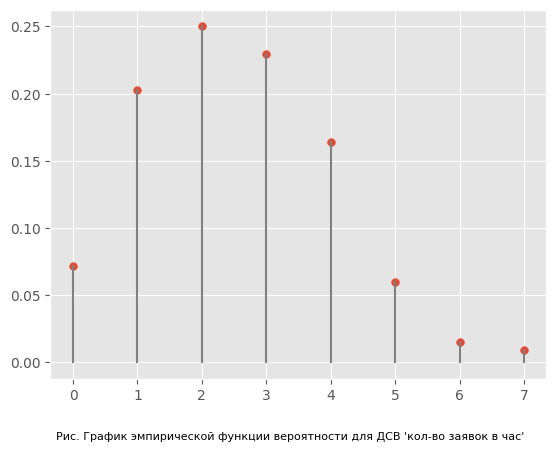

In [ ]:
# построим график эмпирической функции вероятности - полигон частот
plt.scatter(p_i.index, p_i.values, s=30)
for i in range(len(p_i)):
    plt.plot([p_i.index[i], p_i.index[i]], [0, p_i.values[i]], c='grey')
plt.suptitle("Рис. График эмпирической функции вероятности для ДСВ 'кол-во заявок в час'", y=0, fontsize=8);

### Закон Пуассона
---
Если рассмотреть такой параметр как $\lambda = n \cdot p$ - среднее кол-во заявок за достаточно большое кол-во испытаний (за большой промежуток времени), то распределение кол-ва заявок за это время будет подчиняться закону Пуассона:

$$p_{\lambda}(k) = \frac {\lambda^k \cdot e^{-\lambda}}{k!}$$

Распределение, заданное данной формулой, называется **распределением Пуассона с параметром $\lambda$**.

Про соответствующую С.В. говорят, что она подчиняется закону Пуассона с параметром $\lambda$:

$$X \in Poisson(\lambda)$$

---

для нашего примера со СВ "Кол-во заявок в час" имеем
$$\lambda = n \cdot p = 60 * 0.04 = 2.4$$
Тогда получим следующее распределение Пуассона:

$$p_{\lambda}(k) = \frac {2.4^k \cdot e^{-2.4}}{k!}$$

In [ ]:
def poisson_fun(k, lamda=2.4):
    res = lamda**k * np.exp(-lamda) / np.math.factorial(k)
    return res

poisson_fun(0), poisson_fun(1), poisson_fun(2)

(0.09071795328941251, 0.21772308789459002, 0.261267705473508)

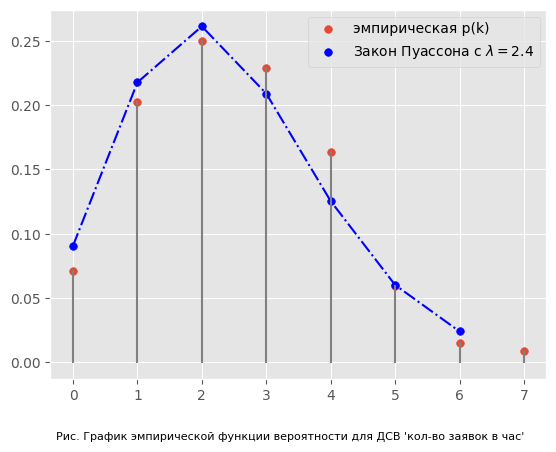

In [ ]:
# совместим график эмпирической функции вероятности с теоретической
k_i = np.array(p_i.index, dtype=int)
ki = np.array(range(max(k_i)))
fi = [poisson_fun(k) for k in ki]
plt.scatter(k_i, p_i.values, s=30, label="эмпирическая p(k)")
plt.scatter(ki, fi, s=30, c='blue', label='Закон Пуассона с $\lambda = 2.4$')
plt.plot(ki, fi, '-.', c='blue')
for i in range(len(p_i)):
    plt.plot([p_i.index[i], p_i.index[i]], [0, p_i.values[i]], c='grey')
plt.suptitle("Рис. График эмпирической функции вероятности для ДСВ 'кол-во заявок в час'", y=0, fontsize=8)
plt.legend();

### ЗАДАЧА. Найти вероятность
Какова вероятность того, что в час поступит более 5 заявок?

In [ ]:
sum(p_i[6:]), 1 - sum(p_i[0:6])

(0.023809523809523808, 0.023809523809523947)

более 6 заявок?

In [ ]:
sum(p_i[7:])

0.011904761904761904

### Случайная величина Y = "Кол-во заявок в день"
---
Значение данной СВ мы можем найти просто просуммировав значения СВ Xi, i=1..24*60 полученные при ежеминутном испытании Бернулли:

$$Y = \sum_{i=1}^{24*60} X_i$$

In [ ]:
# Смоделируем 24 * 60 испытаний и подсчитаем кол-во поступивших заявок за день
def requests_a_day(p, n = 24 * 60):
    S = sum(np.random.random(n) <= p)
    return S

requests_a_day(p), requests_a_day(p), requests_a_day(p)

(56, 58, 54)

In [ ]:
np.random.seed(123)

# смоделируем наблюдения за год (365 значений С.В. Y)
Yi = [requests_a_day(p) for _ in range(365)]
print(Yi)

[68, 63, 67, 58, 47, 63, 37, 56, 58, 54, 64, 51, 52, 54, 54, 61, 49, 50, 49, 65, 46, 52, 62, 62, 62, 57, 53, 51, 59, 55, 80, 49, 53, 63, 53, 68, 66, 64, 63, 47, 60, 47, 56, 70, 52, 56, 61, 64, 63, 66, 56, 48, 57, 54, 59, 64, 43, 56, 68, 53, 62, 51, 57, 64, 68, 53, 53, 63, 55, 58, 59, 72, 57, 62, 47, 66, 58, 48, 57, 66, 58, 57, 47, 60, 61, 41, 52, 62, 60, 67, 61, 51, 44, 55, 48, 58, 56, 66, 62, 60, 52, 56, 59, 52, 70, 52, 51, 61, 57, 62, 56, 47, 46, 53, 66, 58, 62, 55, 56, 50, 64, 42, 62, 52, 60, 64, 62, 46, 37, 53, 68, 53, 65, 73, 65, 62, 59, 50, 51, 53, 68, 61, 64, 56, 50, 58, 56, 49, 53, 62, 49, 54, 61, 44, 52, 49, 53, 52, 75, 55, 52, 62, 57, 57, 51, 51, 49, 68, 71, 58, 61, 63, 40, 54, 51, 48, 47, 59, 69, 57, 52, 55, 66, 52, 68, 57, 56, 60, 49, 53, 55, 58, 59, 53, 63, 53, 62, 65, 49, 64, 58, 54, 55, 54, 71, 54, 65, 58, 63, 53, 48, 58, 63, 63, 65, 58, 51, 51, 65, 62, 55, 51, 64, 49, 61, 50, 53, 56, 62, 44, 57, 67, 62, 52, 48, 60, 75, 53, 43, 59, 67, 46, 60, 49, 60, 72, 65, 53, 50, 69,

### Эмпирический закон распределения вероятностей. Полигон частот.

In [ ]:
# сконструируем эмпирическую функцию вероятности - подсчитаем частоты появления каждого значения
n_i = pd.Series(Yi).value_counts()
print(n_i[:10])
# и относительные частоты появления значений С.В.
print("---- относительные частоты (эмпирическая функция вероятности) -----")
p_i = n_i / len(Yi)
print(p_i[:10])

53    24
52    23
58    22
62    19
54    18
57    17
49    17
60    16
56    16
64    16
dtype: int64
---- относительные частоты (эмпирическая функция вероятности) -----
53    0.065753
52    0.063014
58    0.060274
62    0.052055
54    0.049315
57    0.046575
49    0.046575
60    0.043836
56    0.043836
64    0.043836
dtype: float64


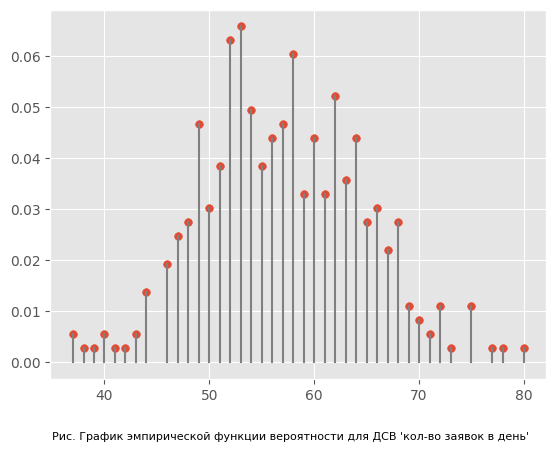

In [ ]:
# построим график эмпирической функции вероятности - полигон частот
plt.scatter(p_i.index, p_i.values, s=30)
for i in range(len(p_i)):
    plt.plot([p_i.index[i], p_i.index[i]], [0, p_i.values[i]], c='grey')
plt.suptitle("Рис. График эмпирической функции вероятности для ДСВ 'кол-во заявок в день'", y=0, fontsize=8);

## Анализ потока поступления заявок на подключение сайтов к системе интернет-платежей
---

### Загрузка и предварительная обработка данных по подключению сайтов клиентов
---

если скачиваем данные с репозитория ...

In [ ]:
# клонируем репозиторий с данными
!git clone "https://github.com/garry-nn/repo1.git"

Cloning into 'repo1'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 3), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (27/27), 1.62 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import pandas as pd
import os

path = "./repo1/Lesson03/"
os.chdir(path)
print(os.listdir("./"))

['TV_lesson03_mc_repo.ipynb', 'requests.xlsx', 'Матбаза_3_занятие_анонс.png']


скачиваем данные ...

In [ ]:
req_dates = pd.read_excel('requests.xlsx', header=0)
req_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    863 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.9 KB


In [ ]:
req_dates

,Date
0,2023-01-02
1,2023-01-02
2,2023-01-02
3,2023-01-03
4,2023-01-03
...,...
858,2023-08-31
859,2023-09-01
860,2023-09-01
861,2023-09-01


In [ ]:
days = req_dates['Date']
vc_days = days.value_counts()
vc_days.sort_index(inplace=True)
vc_days

2023-01-02    3
2023-01-03    2
2023-01-04    2
2023-01-05    3
2023-01-06    4
             ..
2023-08-29    4
2023-08-30    6
2023-08-31    3
2023-09-01    3
2023-09-02    1
Name: Date, Length: 228, dtype: int64

In [ ]:
import datetime as dt

days = req_dates['Date']
days[0] + dt.timedelta(days=1), (days[0] + dt.timedelta(days=1)).date(), dt.datetime.now().date()
all_day_nums = (days[len(days) - 1] - days[0]).days
final_day = (days[0] + dt.timedelta(days=all_day_nums)).date()
final_day, days[len(days) - 1]

(datetime.date(2023, 9, 2), Timestamp('2023-09-02 00:00:00'))

In [ ]:
final_day == vc_days.index[-1].date()

True

###  Предварительная обработка данных: формирование наблюдений СВ R = "Кол-во заявок в день"
---

In [ ]:
def real_requsts_a_day(days: pd.Series):
    numlist = []
    vc_days = days.value_counts()
    vc_days.sort_index(inplace=True)
    all_days_num = (days[len(days) - 1] - days[0]).days
    all_days = [(days[0] + dt.timedelta(days=n)).date() for n in range(all_days_num + 1)]
    ind = 0
    cur_day = vc_days.index[ind]
    for day in all_days:
        if cur_day.date() == day:
            numlist.append(vc_days[cur_day])
            ind += 1
            if ind < len(vc_days):
                cur_day = vc_days.index[ind]
            else:
                break
        elif cur_day.date() > day:
            numlist.append(0)
    return numlist

Ri = real_requsts_a_day(req_dates['Date'])
print(Ri)

[3, 2, 2, 3, 4, 1, 4, 4, 2, 9, 6, 2, 4, 9, 5, 6, 6, 4, 6, 4, 4, 4, 3, 4, 6, 3, 2, 6, 5, 2, 4, 2, 4, 5, 3, 8, 6, 9, 5, 7, 1, 2, 4, 7, 4, 6, 9, 3, 5, 5, 2, 9, 5, 4, 2, 8, 11, 1, 4, 6, 2, 3, 2, 4, 8, 3, 4, 9, 0, 0, 4, 5, 5, 6, 0, 4, 8, 3, 5, 4, 3, 8, 3, 5, 7, 4, 6, 3, 3, 1, 1, 2, 2, 13, 8, 5, 2, 3, 2, 5, 4, 10, 3, 2, 4, 8, 7, 2, 2, 3, 5, 2, 7, 3, 2, 8, 0, 1, 1, 3, 3, 0, 3, 1, 5, 0, 2, 4, 3, 5, 2, 6, 4, 5, 3, 3, 3, 4, 4, 2, 3, 2, 1, 1, 7, 0, 1, 6, 2, 5, 2, 0, 2, 3, 2, 1, 6, 1, 1, 3, 0, 3, 6, 5, 3, 0, 2, 2, 2, 2, 3, 1, 3, 3, 2, 2, 4, 6, 2, 7, 3, 2, 4, 4, 4, 1, 0, 5, 1, 4, 4, 6, 1, 5, 3, 2, 1, 4, 5, 2, 2, 3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 3, 2, 2, 1, 3, 6, 1, 7, 3, 1, 4, 2, 0, 6, 6, 4, 5, 0, 4, 2, 0, 0, 5, 4, 1, 2, 2, 1, 4, 6, 3, 3, 1]


In [ ]:
len(Ri)

244

### Эмпирический закон распределения вероятностей. Полигон частот.

In [ ]:
# сконструируем эмпирическую функцию вероятности - подсчитаем частоты появления каждого значения
n_Ri = pd.Series(Ri).value_counts()
print(n_Ri[:5])
# и относительные частоты появления значений С.В.
print("---- относительные частоты (эмпирическая функция вероятности) -----")
p_Ri = n_Ri / len(Ri)
p_Ri.sort_index(inplace=True)
print(p_Ri[:5])

2    48
3    43
4    39
1    28
5    24
dtype: int64
---- относительные частоты (эмпирическая функция вероятности) -----
0    0.065574
1    0.114754
2    0.196721
3    0.176230
4    0.159836
dtype: float64


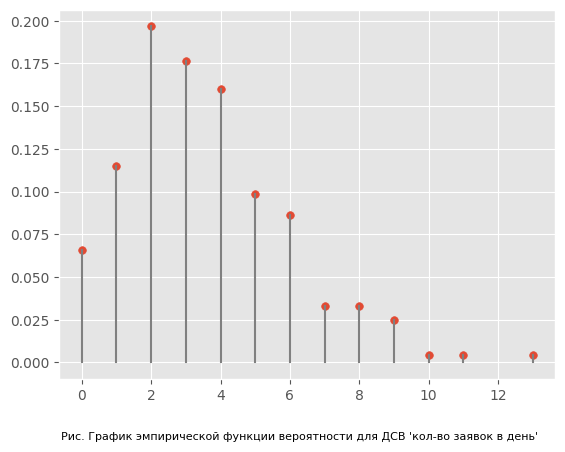

In [ ]:
# построим график эмпирической функции вероятности - полигон частот
plt.scatter(p_Ri.index, p_Ri.values, s=30)
for i in range(len(p_Ri)):
    plt.plot([p_Ri.index[i], p_Ri.index[i]], [0, p_Ri.values[i]], c='grey')
plt.suptitle("Рис. График эмпирической функции вероятности для ДСВ 'кол-во заявок в день'", y=0, fontsize=8);

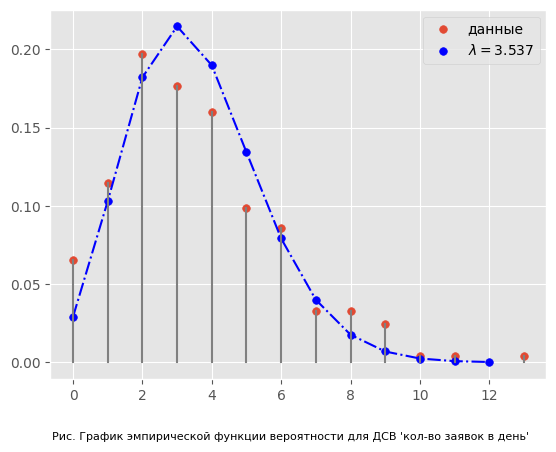

In [ ]:
# совместим график эмпирической функции вероятности с теоретической
k_i = np.array(p_Ri.index, dtype=int)
ki = np.array(range(max(k_i)))
lamda = np.round(np.mean(Ri), 3)
# lamda = 3.0
fi = [poisson_fun(k, lamda=lamda) for k in ki]
plt.scatter(k_i, p_Ri.values, s=30, label="данные")
plt.scatter(ki, fi, s=30, c='blue', label=f'$\lambda = {lamda}$')
plt.plot(ki, fi, '-.', c='blue')
for i in range(len(k_i)):
    plt.plot([k_i[i], k_i[i]], [0, p_Ri.values[i]], c='grey')
plt.suptitle("Рис. График эмпирической функции вероятности для ДСВ 'кол-во заявок в день'", y=0, fontsize=8)
plt.legend();

# Выводы
---

> под капотом множества статистических распределений лежат простые закономерности, которые можно представить как результат серии испытаний Бернулли;

> эти закономерности описываются известными законами распределений СВ, как-то:
- Закон Пуассона;
- Биномиальный закон;
- нормальный закон;
- экспоненциальный закон;

> многие полученные результаты наблюдений могут быть с хорошей точностью описаны с помощью этих Законов распределения вероятностей; для этого надо только оценить параметры этих Законов (например, $\lambda$ для закона Пуассона)

С каждым из этих Законов мы подробно познакомимся в следующих уроках.